In [1]:
import os
os.chdir('/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py')

from functions import *
from flags import * 

import psycopg2
from psycopg2 import OperationalError
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from IPython.display import HTML
import webbrowser

In [2]:
conn = psycopg2.connect(
    host = "contratos-base-gov1.cf87yxnqgph8.eu-central-1.rds.amazonaws.com",
    port = 5432,
    #database = "contratosbasegov",
    user = "contratosbasegov",
    password = "8n9nyeTBFUyCcLJShNrZdPUai2KQkue4")

cur = conn.cursor()

In [3]:
cur.execute('''ROLLBACK;''')

In [4]:
def contratos(ide):
    '''
    Função que retorna contratos referentes a um conjunto de ids

    Parâmetros :
        ide : tuplo de id's de anúncios

    return:
        dataframe com contratos
    '''
        
    cur = conn.cursor()
    cur.execute('''
        SELECT *
        FROM "contratos"
        WHERE id IN %s; ''', (tuple(ide),))
    return pd.DataFrame(cur.fetchall())

In [5]:
# Filtrar contratos : concursos públicos com CPV's começados por 72
cpub = sorted(cpv('72', 'Concurso público'))

In [6]:
cp = contratos(cpub)

In [7]:
cp = cp.rename(columns={0:'ID', 1:'NrAnuncio', 2:'PrecoBase', 18:'PrecoContratual'})
h(cp.head(2))

ID,NrAnuncio,PrecoBase,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,PrecoContratual,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
10052145,2926/2023,114735.85,6,False,6365075,12741885,2023-02-28,42,2,False,False,https://dre.pt/application/file/207943081,Anúncio de procedimento,Concurso público,Concurso Público - Prestação De Serviços - Licenciamento Microsoft,2023-06-01,2023-05-31,107819.58,366,Município de Lagoa (506804240)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=1693),"Artigo 20.º, n.º 1, alínea b) do Código dos Contratos Públicos",INETUM ESPAÑA SA (980079659)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=1629),None,https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=341151,https://community.vortal.biz/PRODPublic/Tendering/OpportunityDetail/Index?noticeUID=PT1.NTC.2285441,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2008842&ext=.pdf,false,72500000-0,False,None,None,False,False,None,False,None,False,Aquisição de serviços,Serviços relacionados com a informática,Principal,107819.58,Concurso Público - Prestação De Serviços - Licenciamento Microsoft,Não aplicável,None,"Portugal, Faro, Lagoa",Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",None,None,1700240926
10054158,3047/2023,689280.00,30,False,6368398,12749634,2023-03-01,43,2,False,False,https://dre.pt/application/file/208006516,Anúncio de procedimento,Concurso público,Aquisição de serviços de Gestão e Administração Soluções Tecnologia Microsoft para anos 2023 a 2025.,2023-06-01,2023-06-01,622075.20,976,"Instituto de Informática, I. P. (504322915)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=1957)","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos","IGNIT PEOPLE , S.A. (515777048)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=3696569)",Real Life Technologies (508535166),https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=341299,https://www.acingov.pt/acingovprod/2/zonaPublica/zona_publica_c/donwloadProcedurePiece/NjE1Nzg5,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2009382&ext=.pdf,false,72590000-7,False,None,None,False,False,None,False,None,False,Aquisição de serviços,Serviços de informática prestados por profissionais,Principal,622075.2,Aquisição de serviços de Gestão e Administração Soluções Tecnologia Microsoft para anos 2023 a 2025.,Não aplicável,None,"Portugal, Lisboa, Oeiras",Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",None,None,1700237848


In [8]:
# Preço Base e Preço Contratual de todos os contratos públicos realizados para CPV's começados por 72
pb = preco_base3(cpub)
pc = preco_contrato3(cpub)

# O preço base e o preço contratual estão a ser obtidos de forma correta da base de dados
# O problema é que o ID não corresponde ao contrato. Quando dou os ids como input à função contratos - sendo que estes ids são provenientes da função cpv() - ele ordena os contratos por ordem crescente de ID 
# Já funciona : foi necessário colocar os ids provenientes de cpv() por ordem crescente

pb[1], pc[1], cpub[1]

(689280.0, 622075.2, ('10054158',))

In [9]:
f = redflag(pb, pc, 0.1, cpub, 20)

/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/flags.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = pbase[i] / pcontr[i]


/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

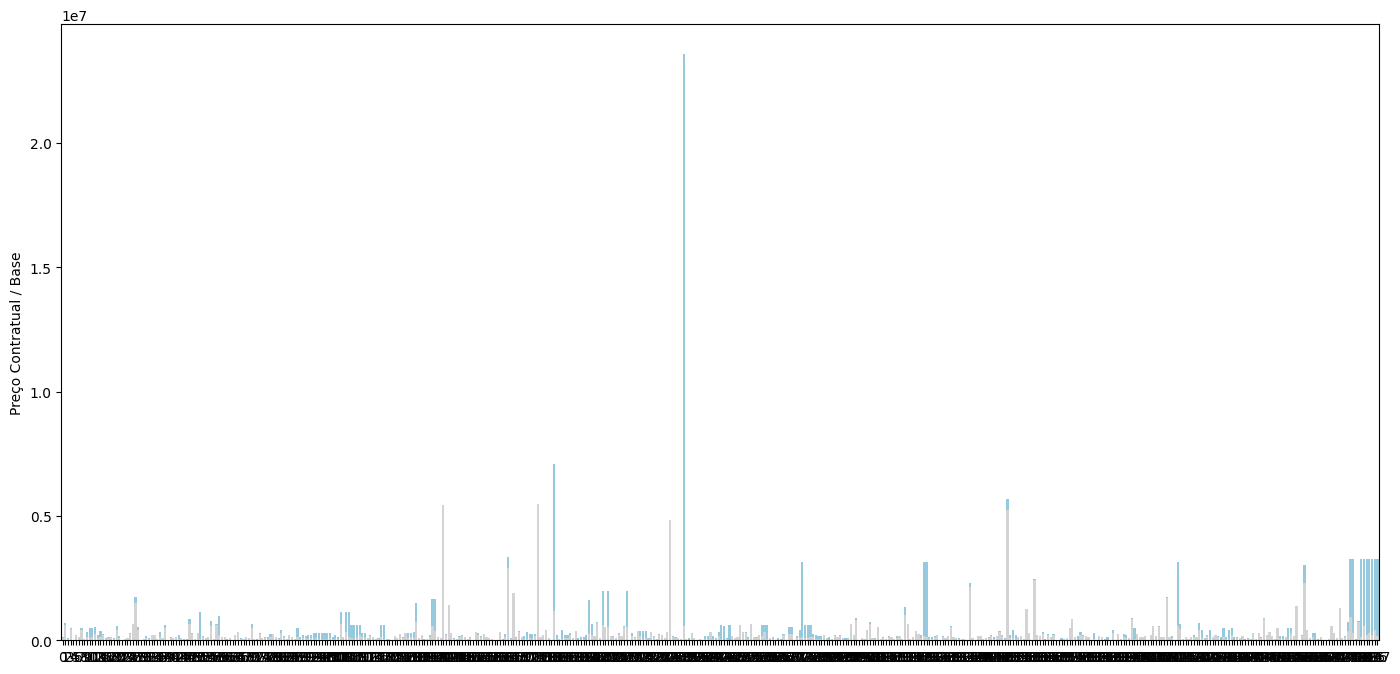

In [11]:
# Plot do Preço Base vs Preço Contratual para ver diferenças entre ambos para um mesmo contrato
df = contratos(cpub).iloc[:,[2,18]]
df = df.rename(columns={2: 'PrecoBase', 18:'PrecoContratual'})
df = df.astype('float')

plt.figure(figsize=(17,8))
sns.barplot(x = df.index, y = df.PrecoBase, color = 'skyblue')
sns.barplot(x = df.index, y = df.PrecoContratual, color = 'lightgray', fill=0.1)
plt.ylabel('Preço Contratual / Base')
plt.show()

In [12]:
# Índice com preço contratual nulo
np.where(pc == 0)

(array([376]),)

In [13]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

(np.round(pb/pc, 4))

/tmp/ipykernel_2710/2437271471.py:4: RuntimeWarning: divide by zero encountered in divide
  (np.round(pb/pc, 4))


array([ 1.064,  1.108,  2.   ,  1.049,  1.019,  1.004,  1.285,  1.174,
        1.188,  2.808,  4.707,  4.181,  2.162,  2.637,  3.026,  1.307,
        1.223,  1.4  ,  1.229,  1.681,  1.4  ,  2.098,  1.25 ,  1.002,
        1.   ,  1.125,  1.   ,  1.152,  1.378,  1.006,  1.363,  1.491,
        2.015,  1.146,  1.061,  1.391,  2.679,  1.022,  1.254,  1.053,
        1.32 ,  1.003,  1.13 ,  3.768,  1.004,  2.348, 11.602,  1.286,
        1.04 ,  1.27 ,  1.035, 28.188,  1.444,  1.   ,  1.001,  1.323,
        1.006,  1.085,  4.397,  1.   ,  1.046,  1.465,  1.   ,  7.157,
        1.   ,  1.   ,  2.041,  1.009,  1.   ,  1.002,  1.298,  1.032,
        2.118,  1.115,  1.146,  1.601,  2.668,  2.087,  1.   ,  1.   ,
        1.053,  1.333,  1.083,  1.   ,  1.   ,  1.   ,  1.053,  4.19 ,
        1.77 ,  2.368,  1.703,  4.372,  2.569,  5.699,  3.571,  7.143,
        5.492,  4.804,  4.657,  2.989,  3.729,  3.768,  3.729,  1.77 ,
        1.082,  3.532,  8.593,  7.996, 13.382,  5.375,  2.966,  1.84 ,
      

/tmp/ipykernel_2710/3234519312.py:1: RuntimeWarning: divide by zero encountered in divide
  sns.histplot(pb/pc)
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


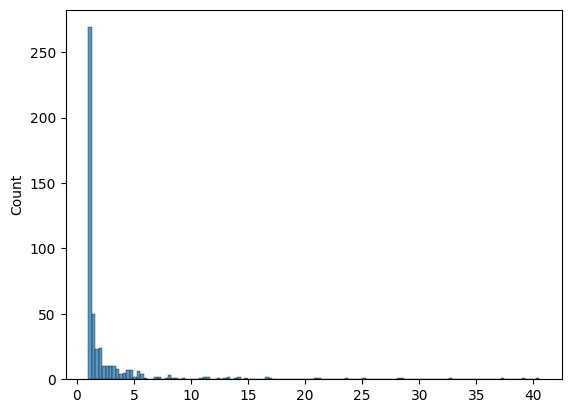

In [14]:
sns.histplot(pb/pc)
plt.show()

***

<br>

<br>

Verificar a situação em que o preco base é muito maior do que o preço contratual

1. pegar no maior valor do rácio pb/pc
2. verificar pb e pc e verificar rácio
4. obter id e verificar que bate certo usando o função contrato()
5. obter o número de anúncio
6. calcular o número de ocorrências do anúncio
7. obter id's para o mesmo número de anúncio
8. somar precos contratuais
9. comparar novamente com o preço base


**1.**

In [27]:
# Índice do contrato com maior rácio 
rat = pb/pc
rat5 = np.where(rat > 5)[0]

print(np.where(rat > 5), '\n\n', rat[np.where(rat > 5)])

print('\n\n\n Índice do maior rácio :', np.where(rat > 30)[0])

(array([ 46,  51,  63,  93,  95,  96, 106, 107, 108, 109, 119, 172, 182,
       185, 194, 195, 215, 230, 232, 244, 245, 247, 261, 274, 275, 276,
       284, 290, 319, 320, 352, 364, 370, 376, 387, 397, 413, 422, 425,
       429, 432, 454, 464, 478, 481, 482, 483, 484, 485, 486, 487]),) 

 [11.602 28.188  7.157  5.699  7.143  5.492  8.593  7.996 13.382  5.375
 16.608  8.62   6.05  11.177  7.779  5.73   9.293 40.503  5.055 16.608
 28.361 37.36  12.347 20.904  7.996  5.375 39.    13.165 16.998 25.295
  5.446 32.779  5.323    inf 13.114 13.813  5.629  5.214  6.991  5.773
  6.991 11.35  14.233 10.789 23.632  5.521 14.818 11.323 14.107  8.028
 21.127]



 Índice do maior rácio : [230 247 284 364 376]


/tmp/ipykernel_2710/2939907773.py:2: RuntimeWarning: divide by zero encountered in divide
  rat = pb/pc


**2.**

In [32]:
i = 284
pb[i],pc[i], pb[i]/pc[i]

(138172.32, 3542.88, 39.0)

**3.**

In [33]:
j = (cpub[i])[0]

Cc = contrato(j)
Cc

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,10230922,11771/2023,138172.32,15,False,6612945,13246654,2023-07-13,135,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700010896


**4**

In [34]:
n_anuncio = Cc.iloc[:,1][0]
n_anuncio

'11771/2023'

**5.**

In [35]:
np.where(cp.NrAnuncio == n_anuncio)

(array([284, 307]),)

In [37]:
contrato(cpub[284])

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,10230922,11771/2023,138172.32,15,False,6612945,13246654,2023-07-13,135,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700010896


In [38]:
contrato(cpub[307])

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,10252068,11771/2023,138172.32,15,False,6612945,13246654,2023-07-13,135,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700039280
